(1080, 1920, 3)

C:\Users\20225523\AppData\Local\Temp\ipykernel_8936\1676793682.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.circle(img, tuple(pt.astype(np.int)), 1, (0,0,255), -1)


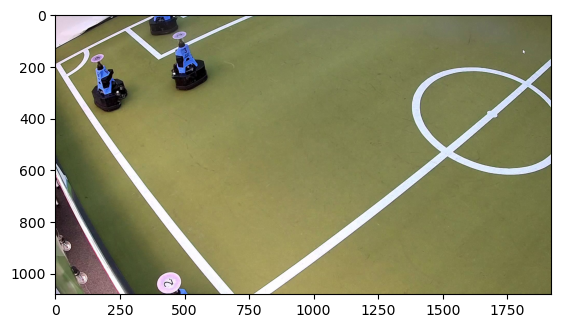

In [1]:
import cv2
import numpy as np
import skimage
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt

img = cv2.imread('TopView.png')
display(img.shape)
plt.imshow(img, cmap='gray')


pts = np.array([[864, 651], [1016, 581], [1205, 667], [1058, 759]], dtype=np.float32)
for pt in pts:
    cv2.circle(img, tuple(pt.astype(np.int)), 1, (0,0,255), -1)

In [ ]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread('TopView.png')

# Define the ROI and corresponding points for IPM
ipm_pts = np.array([[0, 0], [250, 0], [250, 200], [0, 200]], dtype=np.float32)
roi = np.array([[0,200], [280,55], [395,155], [75,325]], dtype=np.float32)

for pt in roi:
    cv2.circle(img, tuple(pt.astype(np.int)), 1, (0,0,255), -1)
# Compute the IPM matrix
ipm_matrix = cv2.getPerspectiveTransform(roi, ipm_pts)

# Apply the IPM matrix to the input image
ipm = cv2.warpPerspective(img, ipm_matrix,(1080, 1920))

# Display the input image and the IPM result
cv2.imshow('Input Image', img)
cv2.imshow('IPM Result', ipm)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\20225523\AppData\Local\Temp\ipykernel_8936\697547236.py:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cv2.circle(img, tuple(pt.astype(np.int)), 1, (0,0,255), -1)


In [ ]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread('Teams.png')

# Define the ROI and corresponding points for IPM
roi = np.array([[864, 651], [1016, 581], [1205, 667], [1058, 759]], dtype=np.float32)
ipm_pts = np.array([[448, 609], [580, 609], [580, 741], [448, 741]], dtype=np.float32)

# Compute the IPM matrix
ipm_matrix = cv2.getPerspectiveTransform(roi, ipm_pts)

# Define a mask for the left half of the image
mask = np.zeros_like(img[:,:,0], dtype=np.uint8)
height, width = mask.shape[:2]
mask[:, :width//2] = 255

# Apply IPM only on the left half of the image
ipm_left = cv2.bitwise_and(cv2.warpPerspective(img, ipm_matrix, (width, height)), cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR))

# Display the input image and the IPM result for the left half
cv2.imshow('Input Image', img)
cv2.imshow('IPM Result (Left Half)', ipm_left)
cv2.waitKey(0)
cv2.destroyAllWindows()
